In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

In [24]:
df = pd.read_csv("demo.csv")

Label ve Outputlara Göre Olasılık Dağılımı Tabloları

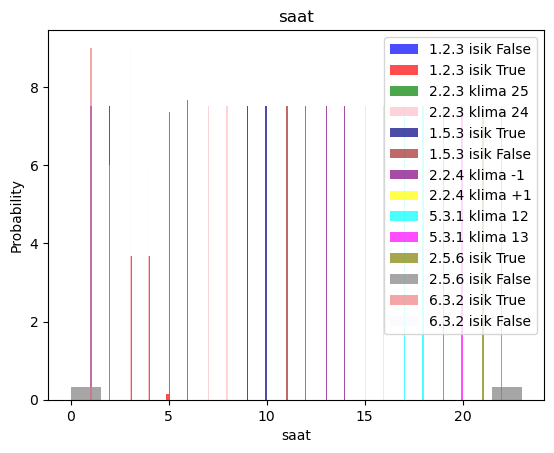

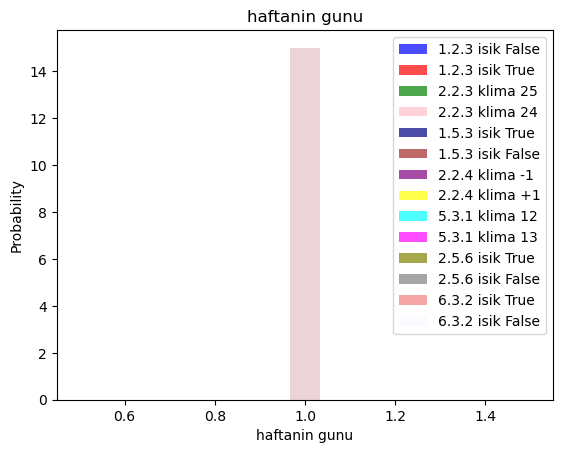

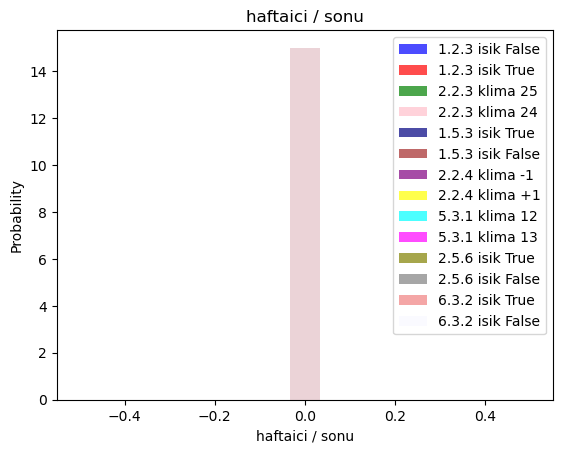

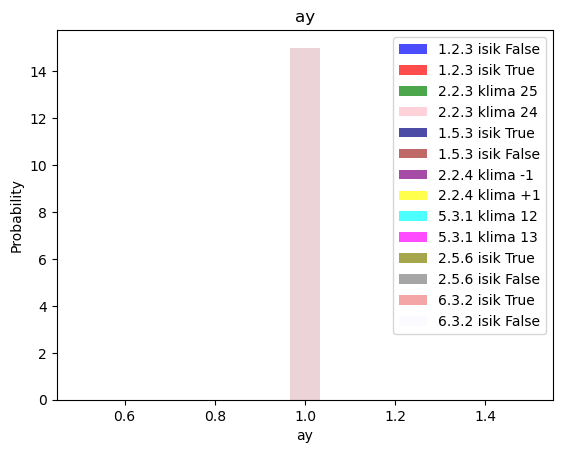

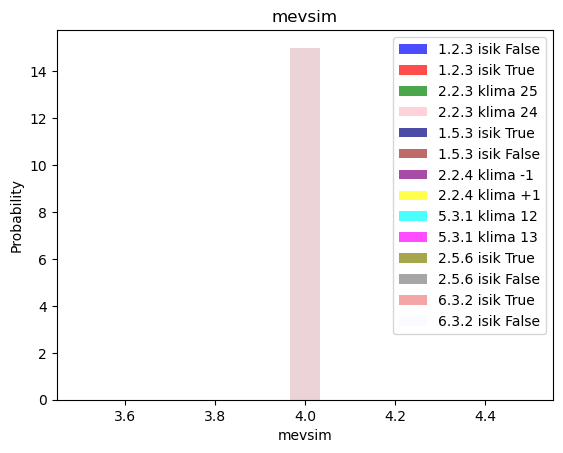

In [25]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    plt.hist(df[df['Y']== '1.2.3 isik False'][label], color='blue', label = '1.2.3 isik False', alpha = 0.7, density =True, bins=15)
    plt.hist(df[df['Y']== '1.2.3 isik True'][label], color='red', label = '1.2.3 isik True', alpha = 0.7, density =True, bins=15)
    plt.hist(df[df['Y']== '2.2.3 klima 25'][label], color='green', label = '2.2.3 klima 25', alpha = 0.7, density =True, bins=15)
    plt.hist(df[df['Y']== '2.2.3 klima 24'][label], color='pink', label = '2.2.3 klima 24', alpha = 0.7, density =True, bins=15)
    plt.hist(df[df['Y']== '1.5.3 isik True'][label], color='navy', label = '1.5.3 isik True', alpha = 0.7, density =True, bins=15)
    plt.hist(df[df['Y']== '1.5.3 isik False'][label], color='brown', label = '1.5.3 isik False', alpha = 0.7, density =True, bins=15)
    plt.hist(df[df['Y']== '2.2.4 klima -1'][label], color='purple', label = '2.2.4 klima -1', alpha = 0.7, density =True, bins=15)
    plt.hist(df[df['Y']== '2.2.4 klima +1'][label], color= 'yellow', label = '2.2.4 klima +1', alpha = 0.7, density =True, bins=15)
    plt.hist(df[df['Y']== '5.3.1 klima 12'][label], color= 'cyan', label = '5.3.1 klima 12', alpha = 0.7, density =True, bins=15)
    plt.hist(df[df['Y']== '5.3.1 klima 13'][label], color='magenta', label = '5.3.1 klima 13', alpha = 0.7, density =True, bins=15)
    plt.hist(df[df['Y']== '2.5.6 isik True'][label], color='olive', label = '2.5.6 isik True', alpha = 0.7, density =True, bins=15)
    plt.hist(df[df['Y']== '2.5.6 isik False'][label], color='gray', label = '2.5.6 isik False', alpha = 0.7, density =True, bins=15)
    plt.hist(df[df['Y']== '6.3.2 isik True'][label], color='lightcoral', label = '6.3.2 isik True', alpha = 0.7, density =True, bins=15)
    plt.hist(df[df['Y']== '6.3.2 isik False'][label], color='ghostwhite', label = '6.3.2 isik False', alpha = 0.7, density =True, bins=15)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()


In [26]:
X= df[df.columns[:-1]].values
y=df[df.columns[-1]].values

# output değerlerini daha sonrasında kullanılan function'larda sıkıntı çıkmaması için sayıya dönüştürüyoruz
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

Keras'la Modelimizi Oluşturuyoruz
>>>Activation modelimiz softmax çünkü sigmoid binary outputu olan modellerde kullanılıyor. Softmax ise bizim modelimiz biri birden fazla output'u olan modellere daha uygun.

In [27]:
model = tf.keras.Sequential([tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(np.unique(y).size, activation='softmax')
                             ])

Modelimizi Compile Ediyoruz
>>>Sparce Categorical Cross Entropy, layerlar ve target arasındaki kayıbı hesaplamak için ekleniyor.

In [28]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

Stratified K Fold Cross Validation
>>>Stratified K Fold ve normal K Fold'un temel farkı, K Fold'da test ve training setinin random seçilmesidir. Buna kıyasla Stratified K Fold'da her output için eşit şekilde training ve test datapointi bulunur. Böylece Stratified K Fold, normal K Fold'a kıyasla daha doğru bir sonuç verir.

In [29]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf.split(X, y):
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    model.fit(X_train_fold, y_train_fold, batch_size=1, epochs=10)
    validation_score = model.evaluate(X_test_fold, y_test_fold)
    lst_accu_stratified.append(validation_score[1])

Epoch 1/10
630/630 [==============================] - 2s 3ms/step - loss: 2.6870 - accuracy: 0.1238
Epoch 2/10
630/630 [==============================] - 2s 3ms/step - loss: 2.1027 - accuracy: 0.2079
Epoch 3/10
630/630 [==============================] - 2s 3ms/step - loss: 1.8146 - accuracy: 0.3238
Epoch 4/10
630/630 [==============================] - 2s 3ms/step - loss: 1.5626 - accuracy: 0.4000
Epoch 5/10
630/630 [==============================] - 2s 3ms/step - loss: 1.3521 - accuracy: 0.4810
Epoch 6/10
630/630 [==============================] - 2s 3ms/step - loss: 1.2224 - accuracy: 0.4984
Epoch 7/10
630/630 [==============================] - 2s 3ms/step - loss: 1.1084 - accuracy: 0.5492
Epoch 8/10
630/630 [==============================] - 2s 3ms/step - loss: 1.0268 - accuracy: 0.5873
Epoch 9/10
630/630 [==============================] - 1s 2ms/step - loss: 0.9487 - accuracy: 0.6079
Epoch 10/10
3/3 [==============================] - 0s 3ms/step - loss: 0.8806 - accuracy: 0.7000
Epo

In [30]:
print(lst_accu_stratified)

[0.699999988079071, 0.7857142686843872, 0.7428571581840515, 0.7428571581840515, 0.8714285492897034, 0.8285714387893677, 0.8714285492897034, 0.8428571224212646, 0.8571428656578064, 0.8428571224212646]


Cross Validation Sonuçları Ortalamasıyla Bulunan Modelimizin Genel Başarı Yüzdesi

In [31]:
validation_average = np.average(lst_accu_stratified)
print(validation_average)

0.8085714221000672


In [32]:
def predict_control_suggestions(saat, gun, haftaicisonu, ay, mevsim, threshold_):
    query_instance = np.array([[saat, gun, haftaicisonu, ay, mevsim]])
    predictions = model.predict(query_instance)

    suggested_actions = label_encoder.inverse_transform(np.arange(predictions.shape[1]))
    probabilities_ = predictions.flatten()

    suggestions_with_probabilities = list(zip(suggested_actions, probabilities_))
    suggestions_with_probabilities.sort(key=lambda x: x[1], reverse=True)  # Sort by probabilities in descending order

    filtered_suggestions = [(suggestion, probability) for suggestion, probability in suggestions_with_probabilities if probability >= threshold_]

    return filtered_suggestions

In [33]:
control_suggestions = predict_control_suggestions(2, 1, 0, 1, 4, 0.0)

print(control_suggestions)

1/1 [==============================] - 0s 97ms/step
[('6.3.2 isik False', 0.7169199), ('1.2.3 isik True', 0.27521625), ('2.2.3 klima 25', 0.0075878766), ('2.2.3 klima 24', 0.0002759412), ('6.3.2 isik True', 4.0124753e-13), ('1.2.3 isik False', 2.7741543e-13), ('1.5.3 isik True', 2.2014918e-13), ('1.5.3 isik False', 8.747676e-30), ('2.5.6 isik False', 6.523456e-36), ('2.2.4 klima +1', 0.0), ('2.2.4 klima -1', 0.0), ('2.5.6 isik True', 0.0), ('5.3.1 klima 12', 0.0), ('5.3.1 klima 13', 0.0)]
